In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
P = 10.8
R = 18.2
alpha = 4.28 * 10**(-3)
dT = 20 

In [3]:
data = pd.read_excel("214.xlsx")


In [4]:
data.head()
data.columns

Index(['Rkal', 'Rkalf', 't1k', 't2k', 'tkal', 'Rironf', 'Riron', 't1i', 't2i',
       'tiron', 'Rlatf', 'Rlat', 't1l', 't2l', 'tlat', 'Unnamed: 15',
       'Unnamed: 16', 'Rl', 'tl', 'dR/dt', 'R', 't', 'dR/dt.1', 'Ri', 'ti',
       'dR/dt.2', 'Re', 'te', 'dR/dt.3'],
      dtype='object')

In [5]:

r_empty = data[['Riron', 'tiron']].dropna()['Riron']
t_empty = data[['Riron', 'tiron']].dropna()['tiron']
t_empty

0        0.000
1       62.220
2      121.005
3      185.015
4      253.125
5      324.680
6      401.125
7      482.570
8      564.470
9      655.755
10     746.580
11     859.310
12     943.780
13    1044.535
14    1149.250
15    1210.195
Name: tiron, dtype: float64

In [6]:
from scipy.interpolate import UnivariateSpline

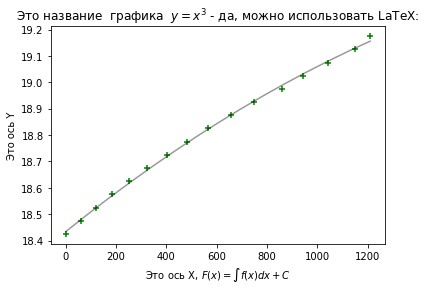

In [7]:
plt.title(r"Это название  графика  $y = x^3$ - да, можно использовать LaTeX:")
plt.ylabel("Это ось Y")
plt.xlabel(r"Это ось X, $F(x) = \int f(x) dx + C$")

plt.scatter(t_empty, r_empty, s = 40, c = "g", alpha=1, marker=r'+', label="Luck")

Xn = np.linspace(np.min(t_empty), np.max(t_empty), 15) 

p = np.polyfit(t_empty, r_empty, 2)
pol = lambda n : p[0] * n**2 + p[1] * n**1 + p[2]
pol(2)
plt.plot(Xn, pol(Xn), c='k', alpha=0.4)

In [8]:
S = pol(Xn) 
Ynn = pol(Xn)

In [9]:
D = np.zeros(len(S) - 1);
for i in range(len(S) - 1):
    D[i] = (Ynn[i] - Ynn[i + 1]) / (Xn[i] - Xn[i + 1])

In [10]:
D

array([0.00075365, 0.00072953, 0.00070541, 0.00068129, 0.00065718,
       0.00063306, 0.00060894, 0.00058482, 0.0005607 , 0.00053659,
       0.00051247, 0.00048835, 0.00046423, 0.00044011])

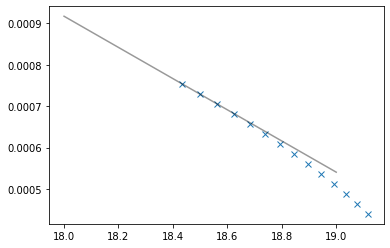

In [11]:
x = Ynn[0:len(S) - 1]

plt.plot(x, D, 'x', alpha=1)

xs = np.linspace(np.min(x) - 0.4, np.max(x), 20) 

p = np.polyfit(x[0:3], D[0:3], 1)

pol = lambda n : p[0] * n + p[1]
xi = np.linspace(18, 19, 100)
plt.plot(xi, pol(xi), c='k', alpha=0.4)

In [12]:
C = P * R * alpha / (pol(R) * (1 + alpha * dT))
C

920.6199587848174

In [13]:
c_empty = 633.7818898491655

In [14]:
(C - c_empty) / (815.1 * 10**-3)

351.90537226800626

In [16]:
def scat():
    
r_empty = data[['Riron', 'tiron']].dropna()['Riron']
t_empty = data[['Riron', 'tiron']].dropna()['tiron']

IndentationError: expected an indented block after function definition on line 1 (1545052662.py, line 3)

In [17]:
def read_rel(data, col1, col2):     
    return data[[col1, col2]].dropna()[col1], data[[col1, col2]].dropna()[col2] 

In [211]:
C = lambda prm, R: P * R * alpha / (prm * (1 + alpha * dT))

In [19]:
def scat(data, tempr, rst, mrk, clr, lbl):
    x, y = read_rel(data, tempr, rst)
    plt.scatter(x, y, s = 20, c = clr, alpha=1, marker=mrk, label=lbl)
    x_pol = np.linspace(np.min(x), np.max(x), 15) 
    p = np.polyfit(x, y, 2)
    pol = lambda n : p[0] * n**2 + p[1] * n**1 + p[2]
    
    plt.title(r"Зависимость сопротивления систем от температуры")
    plt.ylabel(r"$R$, кОм")
    plt.xlabel(r"$t$, c")
    plt.grid(True, linewidth=0.5)
    plt.plot(x_pol, pol(x_pol), c=clr, alpha=0.4)
    plt.legend()
    plt.savefig("Сопротивление от температуры.pdf")
    

In [20]:
def latex_tab(df):
    tab = df.to_latex(index=False, float_format='%.6f')
    tab = tab.replace('\\\\\n', '\\\\ \\hline\n')
    tab = tab.replace('\\toprule', '\\hline')
    tab = tab.replace('\\midrule\n', '')
    tab = tab.replace('\\bottomrule\n', '')
    return tab

In [21]:
print(latex_tab(data[['tkal', 'Rkal', 'tlat', 'Rlat', 'tiron', 'Riron']]))

\begin{tabular}{rrrrrr}
\hline
      tkal &      Rkal &       tlat &      Rlat &       tiron &     Riron \\ \hline
  0.000000 & 18.177000 &   0.000000 & 18.325000 &    0.000000 & 18.425000 \\ \hline
 30.865000 & 18.225000 &  43.420000 & 18.375000 &   62.220000 & 18.475000 \\ \hline
 73.965000 & 18.275000 &  92.940000 & 18.425000 &  121.005000 & 18.525000 \\ \hline
118.585000 & 18.325000 & 145.265000 & 18.475000 &  185.015000 & 18.575000 \\ \hline
166.390000 & 18.375000 & 202.180000 & 18.525000 &  253.125000 & 18.625000 \\ \hline
214.050000 & 18.425000 & 262.965000 & 18.575000 &  324.680000 & 18.675000 \\ \hline
263.970000 & 18.475000 & 320.045000 & 18.625000 &  401.125000 & 18.725000 \\ \hline
314.490000 & 18.525000 & 387.825000 & 18.675000 &  482.570000 & 18.775000 \\ \hline
367.385000 & 18.575000 & 455.255000 & 18.725000 &  564.470000 & 18.825000 \\ \hline
422.030000 & 18.625000 & 531.255000 & 18.775000 &  655.755000 & 18.875000 \\ \hline
478.910000 & 18.675000 & 606.945000 & 18.8250

C:\Users\Quark\AppData\Local\Temp\ipykernel_6544\3442819933.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab = df.to_latex(index=False, float_format='%.6f')


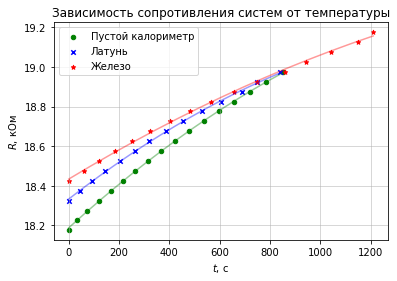

In [22]:
scat(data, 'tkal', 'Rkal', 'o', 'g', 'Пустой калориметр')
scat(data, 'tlat', 'Rlat', 'x', 'b', 'Латунь')
scat(data, 'tiron', 'Riron', '*', 'red', 'Железо')

In [23]:
def deriv(data, tempr, rst, step, t1, take, Rs, fr, end, name):
    x, y = read_rel(data, tempr, rst)
    x_pol = np.linspace(np.min(x), np.max(x), step) 
    p = np.polyfit(x, y, 2)
    pol = lambda n : p[0] * n**2 + p[1] * n**1 + p[2]
    y_pol = pol(x_pol)
    x_pol = x
    y_pol = y
    print(y_pol)
    D = np.zeros(len(y_pol) - 1);
    for i in range(len(y_pol) - 1):
        D[i] = (y_pol[i+1] - y_pol[i]) / (x_pol[i+1] - x_pol[i])
        
    print("D", D)
    plt.plot(y_pol[0:len(x_pol) - 1], D, '*', alpha=1)
    plt.plot(y_pol[0:1], D[0:1], 'x', alpha=1, c='r')
    #plt.plot(y_pol[14:15], D[14:15], 'x', alpha=1, c='r')
    
    print(latex_tab(pd.DataFrame(data = {'D' : D, 'R' : y_pol[0:len(y_pol)-1]})))
    p = np.polyfit(y_pol[t1:take], D[t1:take],2)
    #pol = lambda n : p[0] * n + p[1]
    pol = lambda n : p[0] * n**2 + p[1] * n**1 + p[2]

    print('p[0] or A = ', p[0])
    print('p[1] or B = ', p[1])
    print('p[2] or A = ', p[2])

    print('Deiff: ', (pol(y_pol[t1:take]) - D[t1:take]))
    print('Square error: ', ((pol(y_pol[t1:take]) - D[t1:take])**2).sum())
    #mnk(y_pol[t1:take], D[t1:take])
    xi = np.linspace(fr, end, 100)
    plt.plot(xi, pol(xi), c='k', alpha=0.4)
    plt.title(r"Зависимость производной от сопротивления")
    plt.ylabel(r"$\partial R/\partial t}$, кОм/с")
    plt.xlabel(r"$R$, кОм")
    
    plt.savefig("Производные " + name + ".pdf", format="pdf")
    plt.legend()
    plt.show()
    
    print(pol(Rs))
   
    return pol(Rs) 


C:\Users\Quark\AppData\Local\Temp\ipykernel_6544\3442819933.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab = df.to_latex(index=False, float_format='%.6f')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0     18.177
1     18.225
2     18.275
3     18.325
4     18.375
5     18.425
6     18.475
7     18.525
8     18.575
9     18.625
10    18.675
11    18.725
12    18.775
13    18.825
14    18.875
15    18.925
16    18.975
Name: Rkal, dtype: float64
D [0.00155516 0.00116009 0.00112057 0.00104592 0.0010491  0.0010016
 0.00098971 0.00094527 0.000915   0.00087904 0.00086806 0.00083493
 0.00081103 0.0007951  0.00077869 0.00075855]
\begin{tabular}{rr}
\hline
       D &         R \\ \hline
0.001555 & 18.177000 \\ \hline
0.001160 & 18.225000 \\ \hline
0.001121 & 18.275000 \\ \hline
0.001046 & 18.325000 \\ \hline
0.001049 & 18.375000 \\ \hline
0.001002 & 18.425000 \\ \hline
0.000990 & 18.475000 \\ \hline
0.000945 & 18.525000 \\ \hline
0.000915 & 18.575000 \\ \hline
0.000879 & 18.625000 \\ \hline
0.000868 & 18.675000 \\ \hline
0.000835 & 18.725000 \\ \hline
0.000811 & 18.775000 \\ \hline
0.000795 & 18.825000 \\ \hline
0.000779 & 18.875000 \\ \hline
0.000759 & 18.925000 \\ \hline
\end{tabular}

p[

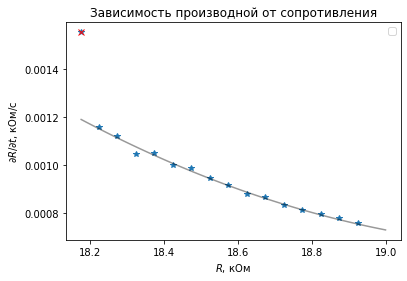

0.0011906578314409971


650.0292870664839

In [24]:
C0 = C(deriv(data, 'tkal', 'Rkal', 15, 1, 13, 18.177, 18.177, 19, 'калориметр'), 18.177)
C0
#2.306829289271642e-09 linear
#1.4915148243880754e-09 square



C:\Users\Quark\AppData\Local\Temp\ipykernel_6544\3442819933.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab = df.to_latex(index=False, float_format='%.6f')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0     18.425
1     18.475
2     18.525
3     18.575
4     18.625
5     18.675
6     18.725
7     18.775
8     18.825
9     18.875
10    18.925
11    18.975
12    19.025
13    19.075
14    19.125
15    19.175
Name: Riron, dtype: float64
D [0.0008036  0.00085056 0.00078113 0.00073411 0.00069876 0.00065407
 0.00061391 0.0006105  0.00054774 0.00055051 0.00044354 0.00059193
 0.00049625 0.00047749 0.00082041]
\begin{tabular}{rr}
\hline
       D &         R \\ \hline
0.000804 & 18.425000 \\ \hline
0.000851 & 18.475000 \\ \hline
0.000781 & 18.525000 \\ \hline
0.000734 & 18.575000 \\ \hline
0.000699 & 18.625000 \\ \hline
0.000654 & 18.675000 \\ \hline
0.000614 & 18.725000 \\ \hline
0.000611 & 18.775000 \\ \hline
0.000548 & 18.825000 \\ \hline
0.000551 & 18.875000 \\ \hline
0.000444 & 18.925000 \\ \hline
0.000592 & 18.975000 \\ \hline
0.000496 & 19.025000 \\ \hline
0.000477 & 19.075000 \\ \hline
0.000820 & 19.125000 \\ \hline
\end{tabular}

p[0] or A =  0.0005544948132494928
p[1] or B =  -0.0213

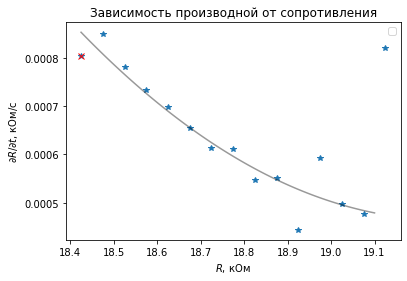

0.0008532948336159862
919.4033254200344


269.37403835355053

In [26]:
C1 = C(deriv(data, 'tiron', 'Riron', 15, 0, 14, 18.425, 18.425, 19.1, 'железо'), 18.425)

#2.484972717052059e-08 linear
#1.925387330826179e-08 squared
print(C1)
(C1 - C0) #/ ((0.8151)) 


In [27]:
1.925387330826179e-08/((15 - 3) * (0.00002**2))

4.0112236058878725

0     18.325
1     18.375
2     18.425
3     18.475
4     18.525
5     18.575
6     18.625
7     18.675
8     18.725
9     18.775
10    18.825
11    18.875
12    18.925
13    18.975
Name: Rlat, dtype: float64
D [0.00115154 0.00100969 0.00095557 0.0008785  0.00082257 0.00087596
 0.00073768 0.00074151 0.00065789 0.00066059 0.00060064 0.00083759
 0.00055115]


C:\Users\Quark\AppData\Local\Temp\ipykernel_6544\3442819933.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab = df.to_latex(index=False, float_format='%.6f')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


\begin{tabular}{rr}
\hline
       D &         R \\ \hline
0.001152 & 18.325000 \\ \hline
0.001010 & 18.375000 \\ \hline
0.000956 & 18.425000 \\ \hline
0.000879 & 18.475000 \\ \hline
0.000823 & 18.525000 \\ \hline
0.000876 & 18.575000 \\ \hline
0.000738 & 18.625000 \\ \hline
0.000742 & 18.675000 \\ \hline
0.000658 & 18.725000 \\ \hline
0.000661 & 18.775000 \\ \hline
0.000601 & 18.825000 \\ \hline
0.000838 & 18.875000 \\ \hline
0.000551 & 18.925000 \\ \hline
\end{tabular}

p[0] or A =  0.001062681516698927
p[1] or B =  -0.040302442900838155
p[2] or A =  0.38276172966633154
Deiff:  2    -0.000007
3     0.000016
4     0.000023
5    -0.000074
6     0.000025
7    -0.000012
8     0.000044
9     0.000019
10    0.000061
11   -0.000188
12    0.000092
Name: Rlat, dtype: float64
Square error:  5.687273601516616e-08


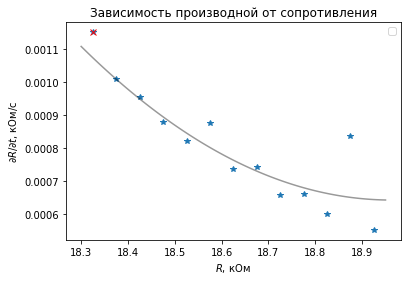

0.0010087928376040778
775.5736534621219


125.54436639563801

In [28]:
C1 =  C(deriv(data, 'tlat', 'Rlat', 14, 2, 13, 18.375, 18.3, 18.95, 'латунь'), 18.375)
print(C1)
(C1 - C0) #/ (0.8751) 

In [29]:
def mnk(x, y):
    sx = (x**2).mean() - (x.mean())**2
    print('Sx = ', sx)
    sy = (y**2).mean() - (y.mean())**2
    print('Sy = ', sy)
    rxy = (y*x).mean() - (y.mean() * x.mean())
    print('Rxy = ', rxy)
    a = rxy / sx
    print('A = ', a)
    da = (1/(len(x) - 2) * (sy/sx - a**2))**(0.5)
    print('delta A = ', da)
    print('Ym = ', y.mean())
    print('Xm = ', x.mean())
    b = y.mean() - a * x.mean()
    print('B = ', b)
    db = da*(sx + (x.mean())**2)**(1/2)
    print('delta B = ', db)
    

In [30]:
x, y = read_rel(data, 'tkal', 'Rkal')
mnk(x, y)


Sx =  69452.13509256055
Sy =  0.059906103806213196
Rxy =  64.34337826989577
A =  0.0009264420479535119
delta A =  1.6847359721351322e-05
Ym =  18.575117647058825
Xm =  388.15970588235297
B =  18.215510174208145
delta B =  0.007904268640871662


In [31]:
al = 4.28*10**(-3)
T = 22
r  = 18.2
p = 10.8

In [32]:
dr = 0.001076

In [33]:
(p*r*al)/(dr*(1+al*T))

714.5716916006659

In [51]:
def chisquare():
    
    

IndentationError: expected an indented block after function definition on line 1 (1603329341.py, line 3)

In [52]:
X = np.array([0, 1, 2, 3, 4, 5])
Y = np.array([1.9, 3.1, 4, 5, 6, 7.2])

k =  1.034285714285714
b =  1.947619047619046


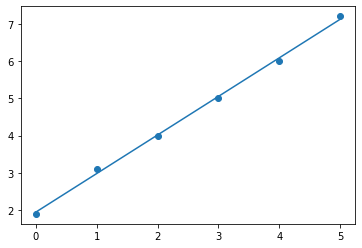

In [53]:
plt.scatter(X, Y)
k, b = np.polyfit(X, Y, 1)
t = np.linspace(X.min(), X.max())
np_appr = lambda t: k * t + b

print('k = ', k)
print('b = ', b)

plt.plot(t, np_appr(t))

In [54]:
def chi(x, X, Y):
    lin = lambda y: x[0]*y + x[1]
    return ((lin(X) - Y)**2).sum()



In [55]:
import scipy.optimize as op

      fun: 0.012500000000005913
 hess_inv: array([[ 0.03572187, -0.10716592],
       [-0.10716592,  0.44649872]])
      jac: array([5.82076609e-10, 1.16415322e-10])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([1.04999998, 1.87500005])

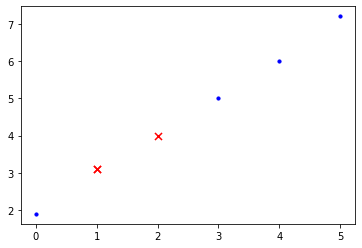

In [56]:
ignore = (1, 2, 1)
plt.scatter(np.take(X, ignore), np.take(Y, ignore), c='r', s=50, marker='x')
plt.scatter(np.delete(X, ignore), np.delete(Y, ignore), c='b', s=10, marker='o')
op.minimize(chi, [2, 2], (np.delete(X, ignore), np.delete(Y, ignore)))

In [57]:
arr = np.array([0, 1, 2, 3, 4, 5, 6])

In [58]:
np.delete(arr, (0, 2, 3, 5))

array([1, 4, 6])

In [59]:
arr

array([0, 1, 2, 3, 4, 5, 6])

In [523]:
R = np.array(data[['Riron', 'tiron']].dropna()['Riron'])
T = np.array(data[['Riron', 'tiron']].dropna()['tiron'])

#R = np.array(data[['Rlat', 'tlat']].dropna()['Rlat'])
#T = np.array(data[['Rlat', 'tlat']].dropna()['tlat'])

#R = np.array(data[['Rkal', 'tkal']].dropna()['Rkal'])
#T = np.array(data[['Rkal', 'tkal']].dropna()['tkal'])

array([18.425, 18.475, 18.525, 18.575, 18.625, 18.675, 18.725, 18.775,
       18.825, 18.875, 18.925, 18.975, 19.025, 19.075, 19.125, 19.175])

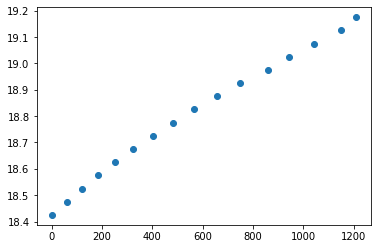

In [524]:
plt.scatter(T, R)
R

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


\begin{tabular}{|c|c|c|c|c|c|c|c|}
dRdT & R \\ \hline
0.000804 & 18.425000 \\ \hline
0.000851 & 18.475000 \\ \hline
0.000781 & 18.525000 \\ \hline
0.000734 & 18.575000 \\ \hline
0.000699 & 18.625000 \\ \hline
0.000654 & 18.675000 \\ \hline
0.000614 & 18.725000 \\ \hline
0.000611 & 18.775000 \\ \hline
0.000548 & 18.825000 \\ \hline
0.000551 & 18.875000 \\ \hline
0.000444 & 18.925000 \\ \hline
0.000592 & 18.975000 \\ \hline
0.000496 & 19.025000 \\ \hline
0.000477 & 19.075000 \\ \hline
0.000820 & 19.125000 \\ \hline
\end{tabular}



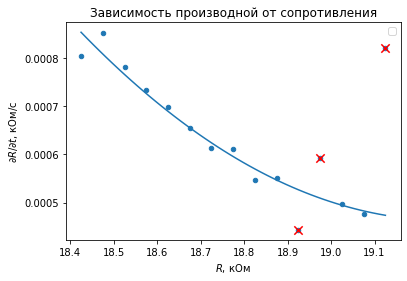

In [537]:
dRdT = (np.delete(np.roll(R, -1), R.size - 1) - np.delete(R, R.size - 1)) \
     / (np.delete(np.roll(T, -1), T.size - 1) - np.delete(T, T.size - 1)) 

       
ignore = (10, 11, 14)
# kal ignore = (0)

#ignore = (0, 5, 11)
X = np.resize(R, dRdT.size)
Y = dRdT

latex = pd.DataFrame({'dRdT' : Y, 'R' : X}).style.hide(level=0, axis=0).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)


t = np.linspace(X.min(), X.max())
if approx:
    plt.plot(t, approx(t))
    
plt.scatter(X, Y, s=20, marker='o')
plt.scatter(np.take(X, ignore), np.take(Y, ignore), s=70, marker='x', c='r')
plt.title(r"Зависимость производной от сопротивления")
plt.ylabel(r"$\partial R/\partial t}$, кОм/с")
plt.xlabel(r"$R$, кОм")
plt.legend()
#plt.savefig('Производные калориметр.pdf')
#plt.savefig('Производные латунь.pdf')
plt.savefig('Производные железо.pdf')
X = np.delete(X, ignore)
Y = np.delete(Y, ignore)

In [531]:
pol = lambda x, t: x[0] * t**2 + x[1] * t + x[2]
E = np.full(X.size, 0.00005)

def chi(x, func, X, Y, E = np.full(X.size, 1)):
    return (((func(x, X) - Y)**2)/(E**2)).sum()

'''p[0] or A =  0.0005544948132494928
p[1] or B =  -0.021362227506727272
p[2] or A =  0.20621209088386988'''


'p[0] or A =  0.0005544948132494928\np[1] or B =  -0.021362227506727272\np[2] or A =  0.20621209088386988'

In [532]:
 stat = op.minimize(chi, [0.000554, -0.021362, 0.20621209], (pol, X, Y), method='SLSQP')
# kal stat = op.minimize(chi, [0.00031263, -0.01218, 0.1193555], (pol, X, Y), method='SLSQP')
#stat = op.minimize(chi, [0.004062, -0.040302, 0.382761729], (pol, X, Y), method='Powell')
stat
#[0.000554, -0.021362, 0.20621209]


     fun: 5.524458725871083e-09
     jac: array([-1.4016599 , -0.07598047, -0.00406214])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 0.00055448, -0.02136197,  0.20621209])

In [533]:
best = stat.x
best

array([ 0.00055448, -0.02136197,  0.20621209])

In [534]:
3.746287580858386e-09/(0.00005**2)

1.4985150323433545

In [535]:
approx = lambda t: best[0] * t**2 + best[1] * t + best[2]

In [536]:
curr = approx(18.475)
curr

0.0008076114467188977

In [505]:
def equ(x):
    return [(chi(best + [0, 0, x[0]], pol, X, Y) - chi(best, pol, X, Y))/0.00005**2 - 1]


#[0] = 2.71730246e-08
#[1] = 5.09687906e-07
#[2] = 9.55752386e-06

#[0] = 4.36039476e-08
#[1] = 8.17273772e-07
#[2] = 1.53142185e-05
roots = op.fsolve(equ, 1)

#np.isclose(equ(roots), [0.0])  # func(root) should be almost 0.0.
#(chi(best + np.array([0, 0, roots[0]]), pol, X, Y) - chi(best, pol, X, Y))/0.0003**2 - 1
#[(chi(best + 2.57283219e-08, pol, X, Y) - chi(best, pol, X, Y))/0.00003**2 - 1]
#[(chi(best + np.array([2.71730246e-08, 0, 0]), pol, X, Y) - chi(best, pol, X, Y))/0.00003**2 - 1]
roots



array([1.58112071e-05])

Iron

In [506]:
#ie = [1.23505825e-06, 2.31700776e-05, 0.00043453]
#ie = [2.71730246e-08, 5.09687906e-07, 9.55752386e-06]

ie = [4.36039476e-08, 8.17273772e-07, 1.53142185e-05]
ke = [4.09267575e-08, 7.59002858e-07, 1.4072166e-05]
le = [4.55188917e-08, 8.48451393e-07, 1.58112071e-05]

In [507]:
def error(err, w):
    return ((err[0]*w**2)**2 + (err[1]*w)**2 + (err[2])**2)**0.5

In [511]:
error(ke, 18.475)/ 

2.4285825368097e-05

In [515]:
(C(0.0008902, 18.475))

883.6790255375535

In [510]:
curr

0.0008902895580056858

In [521]:
270*0.05

13.5

In [291]:
408*0.05

20.400000000000002

In [362]:
2/600

0.0033333333333333335

In [518]:
884-649

235

In [519]:
235/0.87

270.11494252873564